In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')
sns.set(style="whitegrid")

In [5]:

df = pd.merge(deliveries, matches, left_on='match_id', right_on='id')


In [4]:
# . Runs Scored by Batsman
batsman_runs = df.groupby('batter')['batsman_runs'].sum().reset_index()
batsman_runs = batsman_runs.sort_values(by='batsman_runs', ascending=False)
print(batsman_runs)
#batsman_runs.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/batsman_runs.csv', index=False)

           batter  batsman_runs
631       V Kohli          8014
512      S Dhawan          6769
477     RG Sharma          6630
147     DA Warner          6567
546      SK Raina          5536
..            ...           ...
517       S Ladda             0
518  S Lamichhane             0
69   Abdur Razzak             0
565   SS Cottrell             0
290       KM Asif             0

[673 rows x 2 columns]


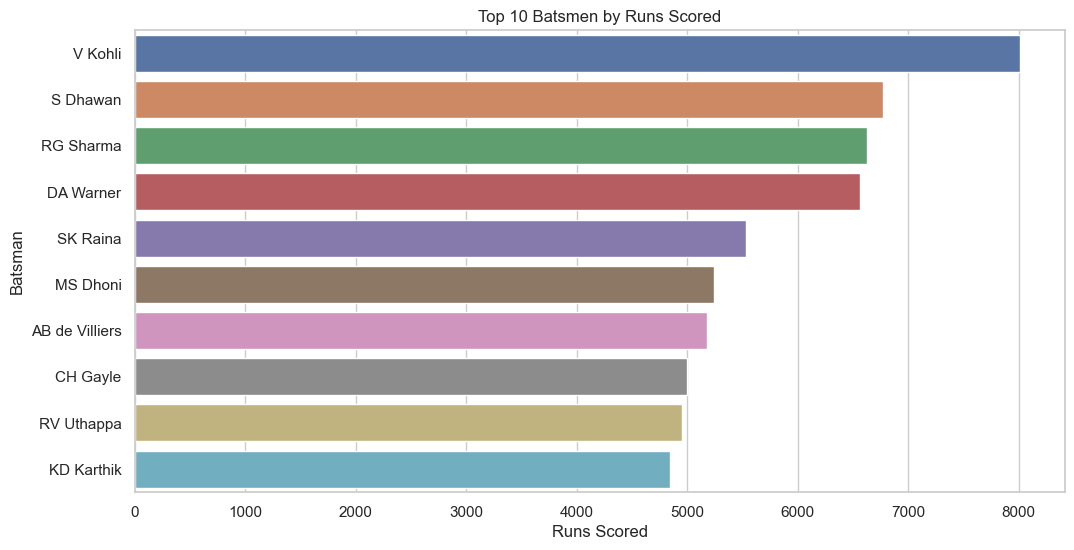

In [5]:

plt.figure(figsize=(12, 6))
sns.barplot(x='batsman_runs', y='batter', data=batsman_runs.head(10))  # Top 10
plt.title('Top 10 Batsmen by Runs Scored')
plt.xlabel('Runs Scored')
plt.ylabel('Batsman')
plt.show()


In [6]:
# Wickets Taken by Bowler
bowler_wickets = df.groupby('bowler')['player_dismissed'].count().reset_index()
bowler_wickets = bowler_wickets.sort_values(by='player_dismissed', ascending=False)
print(bowler_wickets)
#bowler_wickets.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/bowler_wickets.csv', index=False)

            bowler  player_dismissed
524      YS Chahal               213
119       DJ Bravo               207
348      PP Chawla               201
446      SP Narine               200
355       R Ashwin               198
..             ...               ...
97        CJ Green                 0
324     Naman Dhir                 0
139   F du Plessis                 0
320    NL McCullum                 0
100  CK Kapugedera                 0

[530 rows x 2 columns]


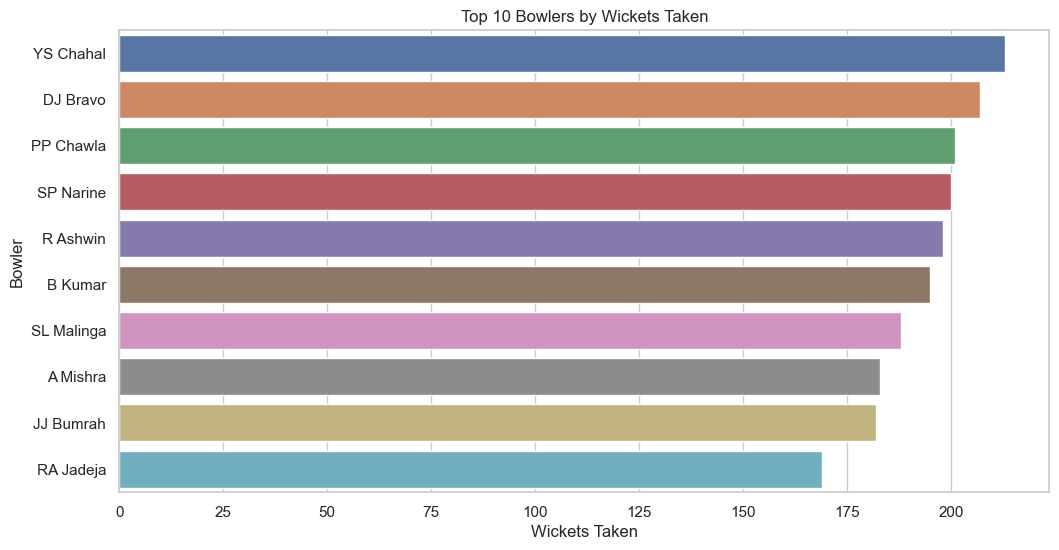

In [7]:

plt.figure(figsize=(12, 6))
sns.barplot(x='player_dismissed', y='bowler', data=bowler_wickets.head(10))  # Top 10
plt.title('Top 10 Bowlers by Wickets Taken')
plt.xlabel('Wickets Taken')
plt.ylabel('Bowler')
plt.show()


In [8]:
#  Strike Rate of Batsmen (Min. 100 balls faced)
balls_faced = df.groupby('batter')['ball'].count().reset_index()
batsman_strike_rate = pd.merge(batsman_runs, balls_faced, on='batter')
batsman_strike_rate['strike_rate'] = (batsman_strike_rate['batsman_runs'] / batsman_strike_rate['ball']) * 100
batsman_strike_rate = batsman_strike_rate[batsman_strike_rate['ball'] >= 100]  # Filter for those who faced at least 100 balls
batsman_strike_rate = batsman_strike_rate.sort_values(by='strike_rate', ascending=False)
print(batsman_strike_rate)
#batsman_strike_rate.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/batsman_strike_rate.csv', index=False)

              batter  batsman_runs  ball  strike_rate
177  J Fraser-McGurk           330   150   220.000000
213         WG Jacks           230   133   172.932331
127          PD Salt           653   385   169.610390
157         T Stubbs           405   239   169.456067
114          TM Head           772   458   168.558952
..               ...           ...   ...          ...
290           Z Khan           117   141    82.978723
307      CJ Ferguson            98   119    82.352941
236    Kuldeep Yadav           183   224    81.696429
334         IR Jaggi            76   100    76.000000
313       RT Ponting            91   129    70.542636

[300 rows x 4 columns]


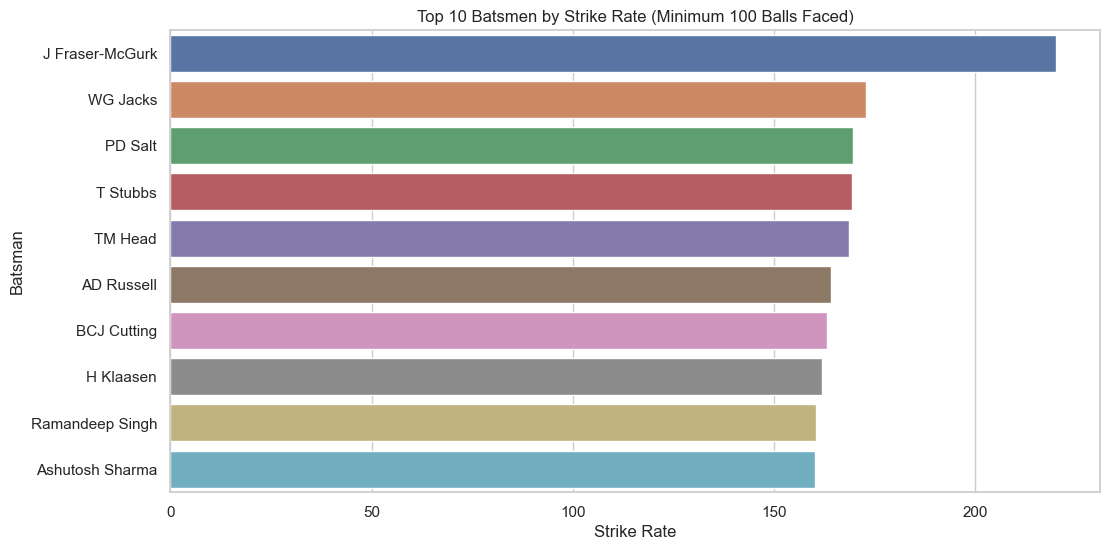

In [9]:

plt.figure(figsize=(12, 6))
sns.barplot(x='strike_rate', y='batter', data=batsman_strike_rate.head(10))  # Top 10
plt.title('Top 10 Batsmen by Strike Rate (Minimum 100 Balls Faced)')
plt.xlabel('Strike Rate')
plt.ylabel('Batsman')
plt.show()


In [10]:
# Dot Ball Percentage (Bowlers)
total_balls_bowled = df.groupby('bowler')['ball'].count().reset_index()
dot_balls_bowled = df[df['total_runs'] == 0].groupby('bowler')['ball'].count().reset_index()
bowler_dot_percentage = pd.merge(total_balls_bowled, dot_balls_bowled, on='bowler', suffixes=('_total', '_dot'))
bowler_dot_percentage['dot_percentage'] = (bowler_dot_percentage['ball_dot'] / bowler_dot_percentage['ball_total']) * 100
bowler_dot_percentage = bowler_dot_percentage.sort_values('dot_percentage', ascending=False)
print(bowler_dot_percentage)
#bowler_dot_percentage.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/bowler_dot_percentage.csv', index=False)

            bowler  ball_total  ball_dot  dot_percentage
24    AC Gilchrist           1         1      100.000000
441        SS Iyer           6         4       66.666667
442      SS Mundhe           7         4       57.142857
240  LA Carseldine           7         4       57.142857
121  DJ Muthuswami          84        44       52.380952
..             ...         ...       ...             ...
184        JE Root          12         1        8.333333
138       FY Fazal          12         1        8.333333
290  Mandeep Singh          12         1        8.333333
154       H Sharma          30         2        6.666667
387       RW Price          18         1        5.555556

[517 rows x 4 columns]


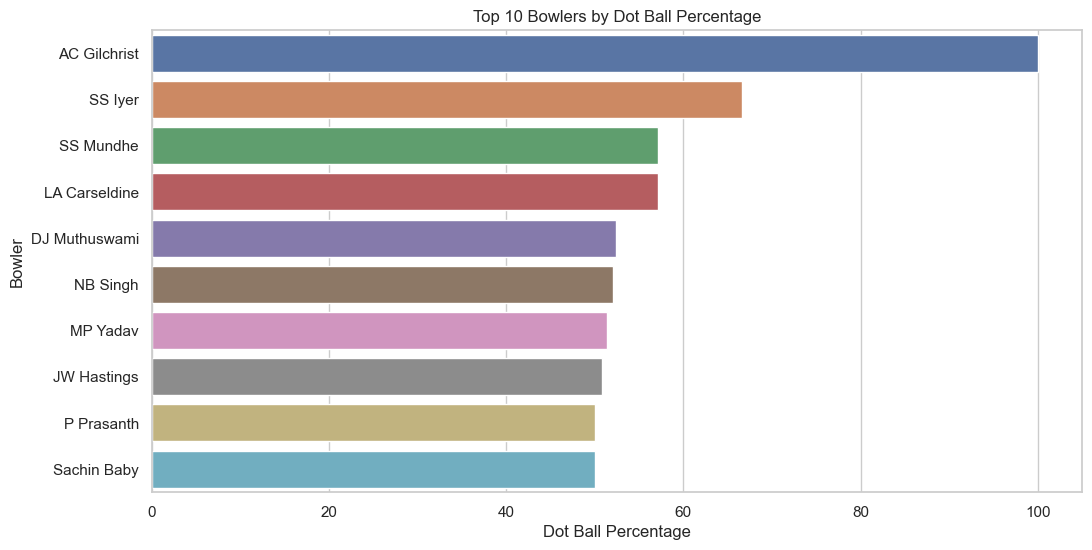

In [11]:

plt.figure(figsize=(12, 6))
sns.barplot(x='dot_percentage', y='bowler', data=bowler_dot_percentage.head(10))
plt.title('Top 10 Bowlers by Dot Ball Percentage')
plt.xlabel('Dot Ball Percentage')
plt.ylabel('Bowler')
plt.show()


In [12]:
# . **Calculate Team Run Rate**
team_run_rate = df.groupby(['season', 'batting_team'])['total_runs'].sum().reset_index()
team_balls = df.groupby(['season', 'batting_team'])['ball'].count().reset_index()
team_run_rate = pd.merge(team_run_rate, team_balls, on=['season', 'batting_team'])
team_run_rate['run_rate'] = (team_run_rate['total_runs'] / team_run_rate['ball']) * 6  # Runs per over
print(team_run_rate)
#team_run_rate.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/team_run_rate.csv', index=False)

      season                 batting_team  total_runs  ball  run_rate
0    2007/08          Chennai Super Kings        2520  1874  8.068303
1    2007/08              Deccan Chargers        2229  1668  8.017986
2    2007/08             Delhi Daredevils        2118  1547  8.214609
3    2007/08              Kings XI Punjab        2464  1739  8.501438
4    2007/08        Kolkata Knight Riders        1942  1557  7.483622
..       ...                          ...         ...   ...       ...
141     2024               Mumbai Indians        2568  1686  9.138790
142     2024                 Punjab Kings        2487  1693  8.813940
143     2024             Rajasthan Royals        2647  1832  8.669214
144     2024  Royal Challengers Bengaluru        2930  1818  9.669967
145     2024          Sunrisers Hyderabad        3052  1919  9.542470

[146 rows x 5 columns]


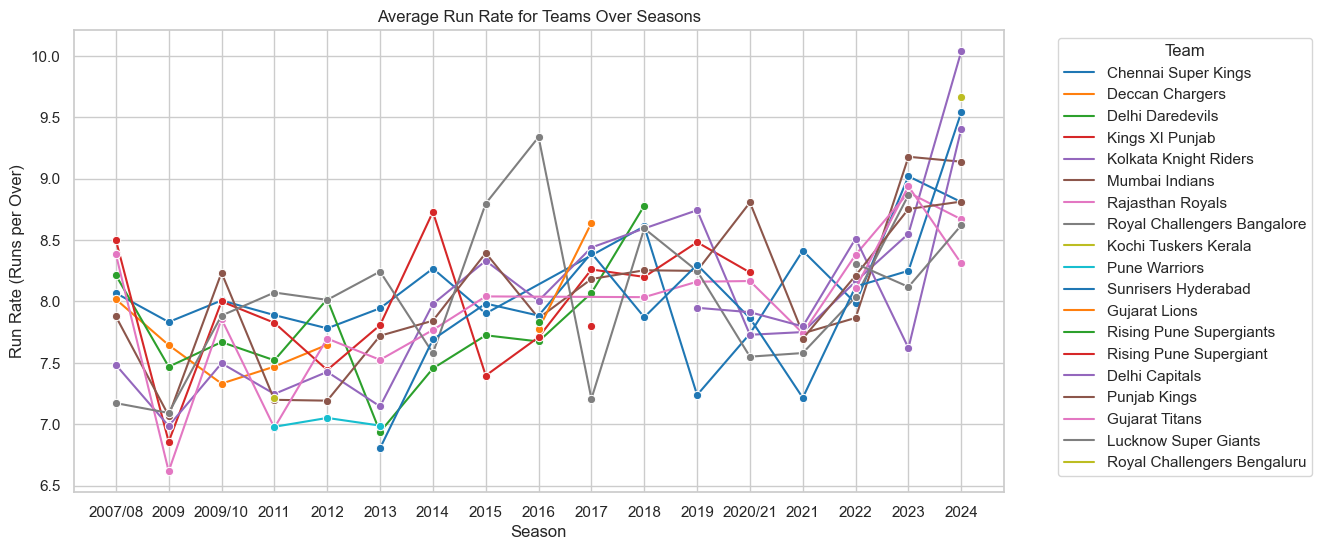

In [13]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='season', y='run_rate', hue='batting_team', data=team_run_rate, marker='o', palette="tab10")
plt.title('Average Run Rate for Teams Over Seasons')
plt.xlabel('Season')
plt.ylabel('Run Rate (Runs per Over)')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [14]:
# . **Calculate Player Run Rate**
player_runs = df.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()
player_balls = df.groupby(['season', 'batter'])['ball'].count().reset_index()
player_run_rate = pd.merge(player_runs, player_balls, on=['season', 'batter'])
player_run_rate['run_rate'] = (player_run_rate['batsman_runs'] / player_run_rate['ball']) * 6  # Runs per over
top_players = player_run_rate.groupby('batter')['batsman_runs'].sum().reset_index()
top_players = top_players[top_players['batsman_runs'] >= 500]  # Minimum total runs filter
player_run_rate = player_run_rate[player_run_rate['batter'].isin(top_players['batter'])]


print(player_run_rate)
#player_run_rate.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/player_run_rate.csv', index=False)

       season          batter  batsman_runs  ball  run_rate
5     2007/08       A Symonds           161   111  8.702703
9     2007/08  AB de Villiers            95   100  5.700000
10    2007/08    AC Gilchrist           436   328  7.975610
12    2007/08        AM Nayar           206   142  8.704225
13    2007/08       AM Rahane             4    19  1.263158
...       ...             ...           ...   ...       ...
2606     2024         V Kohli           741   497  8.945674
2607     2024       V Shankar            83    75  6.640000
2610     2024         VR Iyer           370   238  9.327731
2613     2024         WP Saha           136   120  6.800000
2615     2024     YBK Jaiswal           435   288  9.062500

[1220 rows x 5 columns]


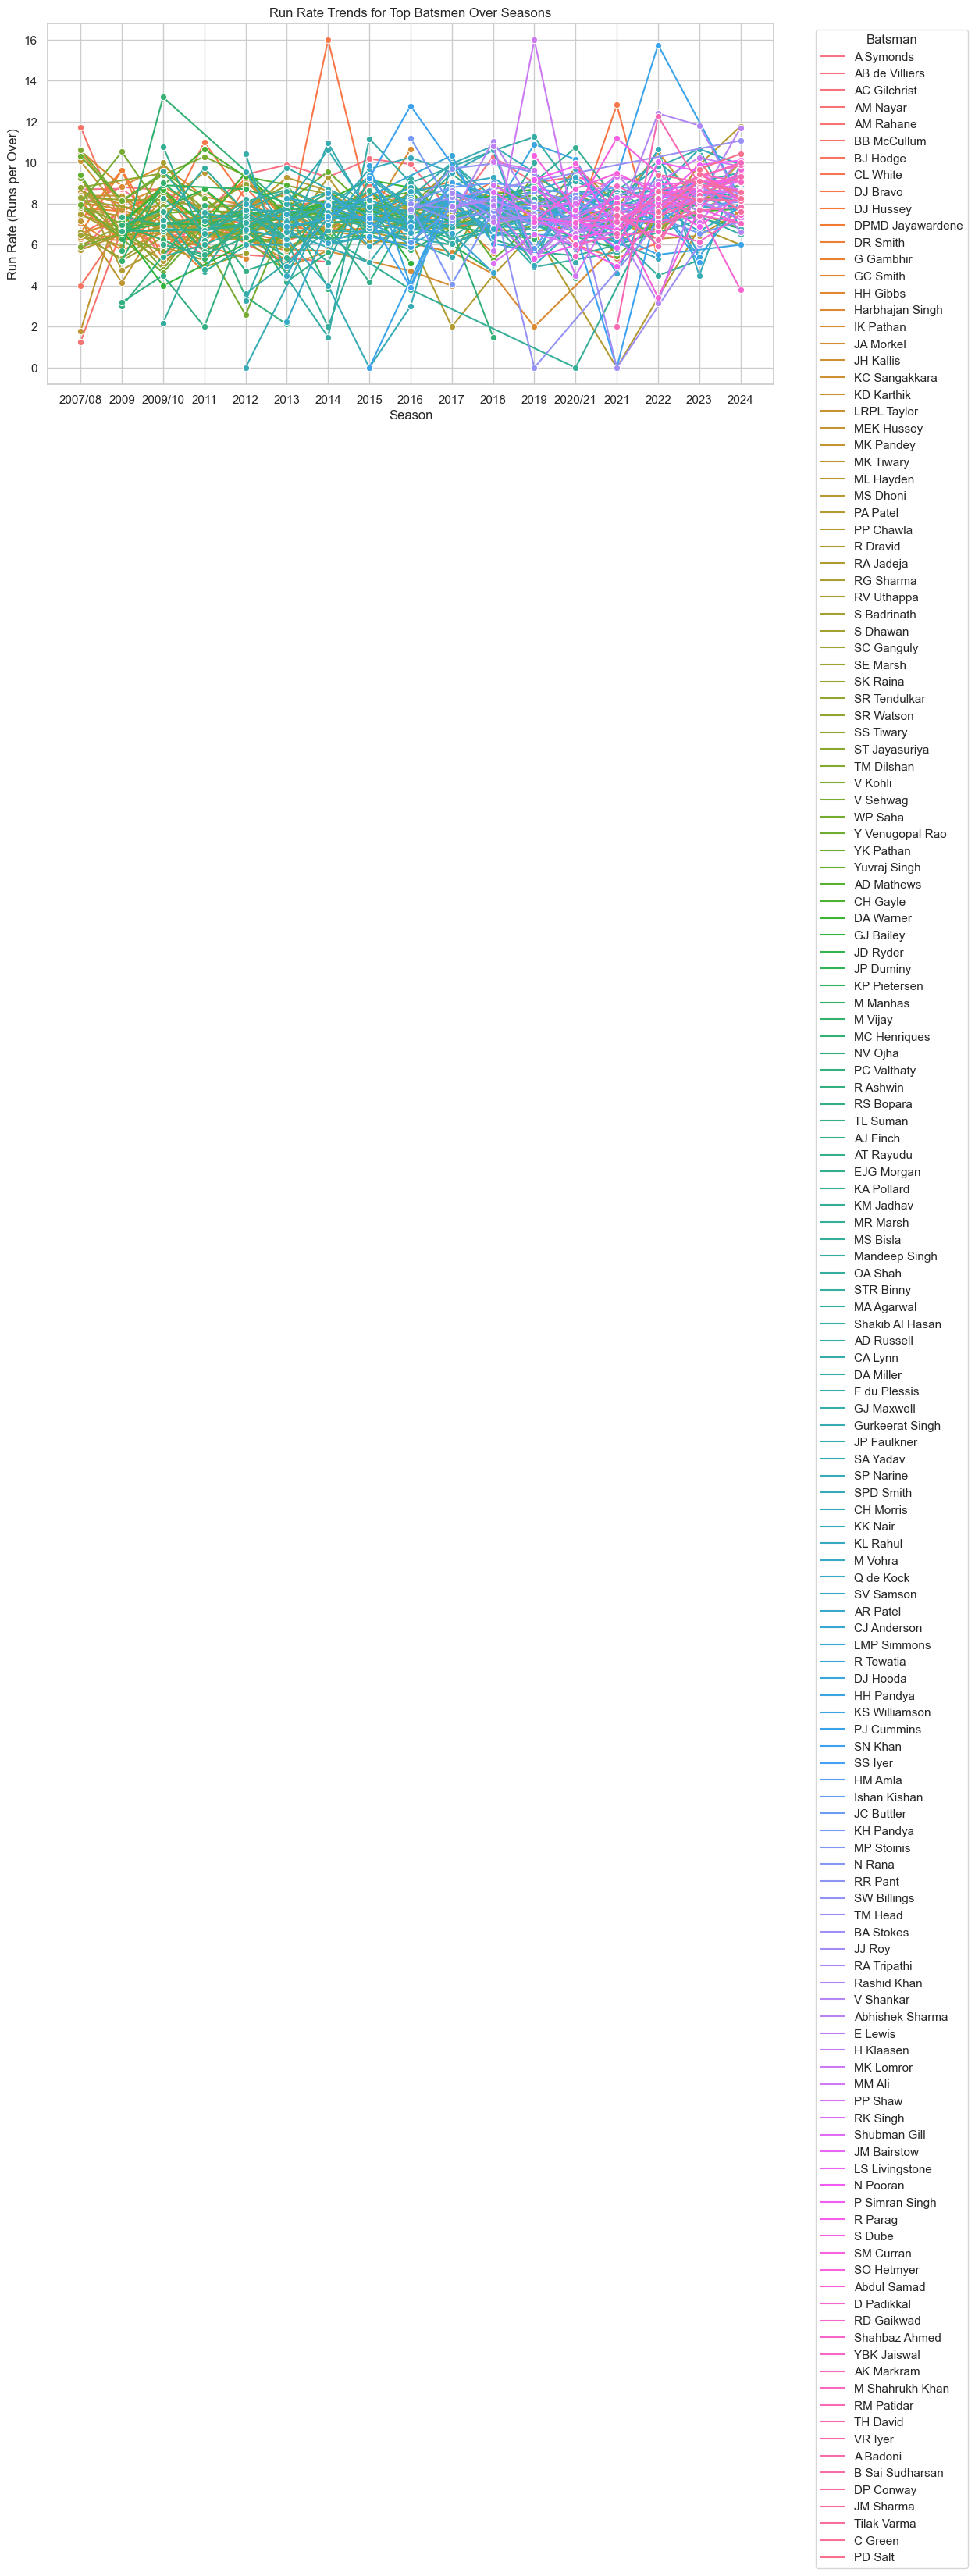

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='season', y='run_rate', hue='batter', data=player_run_rate, marker='o', palette="husl")
plt.title('Run Rate Trends for Top Batsmen Over Seasons')
plt.xlabel('Season')
plt.ylabel('Run Rate (Runs per Over)')
plt.legend(title='Batsman', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [16]:
deliveries['partnership'] = deliveries['batter'] + ' & ' + deliveries['non_striker']

#  Calculate Runs Scored by Each Partnership
partnership_runs = deliveries.groupby('partnership')['total_runs'].sum().reset_index()
partnership_runs = partnership_runs.sort_values(by='total_runs', ascending=False)
print(partnership_runs)
#partnership_runs.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/partnership_runs.csv', index=False)

                        partnership  total_runs
324        AB de Villiers & V Kohli        1623
1477             CH Gayle & V Kohli        1617
8499       V Kohli & AB de Villiers        1511
1795           DA Warner & S Dhawan        1420
8509             V Kohli & CH Gayle        1185
...                             ...         ...
2735  Harbhajan Singh & NLTC Perera           0
6191             R Sharma & A Nehra           0
6193           R Sharma & AC Thomas           0
417            AD Nath & KD Karthik           0
7112        S Kaul & Sandeep Sharma           0

[9120 rows x 2 columns]


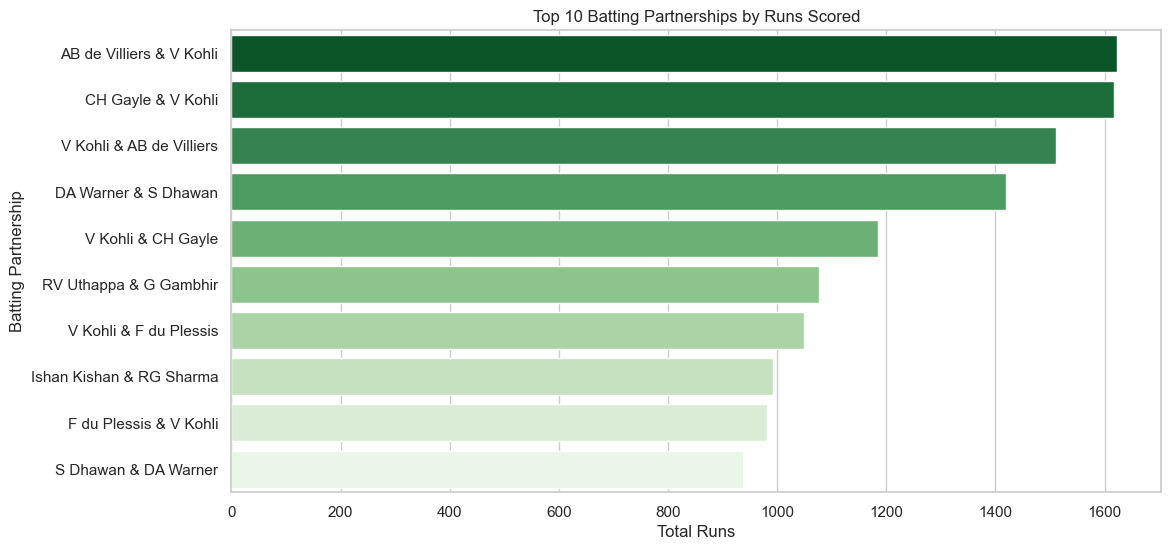

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x='total_runs', y='partnership', data=partnership_runs.head(10), palette="Greens_r")
plt.title('Top 10 Batting Partnerships by Runs Scored')
plt.xlabel('Total Runs')
plt.ylabel('Batting Partnership')
plt.show()

In [18]:
#  Calculate Boundary Rates for Each Partnership
boundaries = deliveries[deliveries['batsman_runs'].isin([4, 6])].groupby('partnership')['batsman_runs'].count().reset_index()
total_balls = deliveries.groupby('partnership')['ball'].count().reset_index()
boundary_rate = pd.merge(boundaries, total_balls, on='partnership', suffixes=('_boundaries', '_balls'))
boundary_rate['boundary_rate'] = (boundary_rate['batsman_runs'] / boundary_rate['ball']) * 100
boundary_rate = boundary_rate.sort_values(by='boundary_rate', ascending=False)
print(boundary_rate)
#boundary_rate.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/boundary_rate.csv', index=False)

                      partnership  batsman_runs  ball  boundary_rate
3487           NK Patel & M Rawat             1     1     100.000000
4516           S Aravind & Z Khan             1     1     100.000000
2161  JP Duminy & NM Coulter-Nile             1     1     100.000000
4151    RA Tripathi & LH Ferguson             1     1     100.000000
1454    DW Steyn & A Ashish Reddy             1     1     100.000000
...                           ...           ...   ...            ...
4241           RG Sharma & N Rana             1    40       2.500000
2415     KH Pandya & Ishan Kishan             1    40       2.500000
2725       LRPL Taylor & V Sehwag             1    50       2.000000
3879          R Ashwin & MS Dhoni             1    52       1.923077
4059        R Tewatia & SV Samson             1    57       1.754386

[5940 rows x 4 columns]


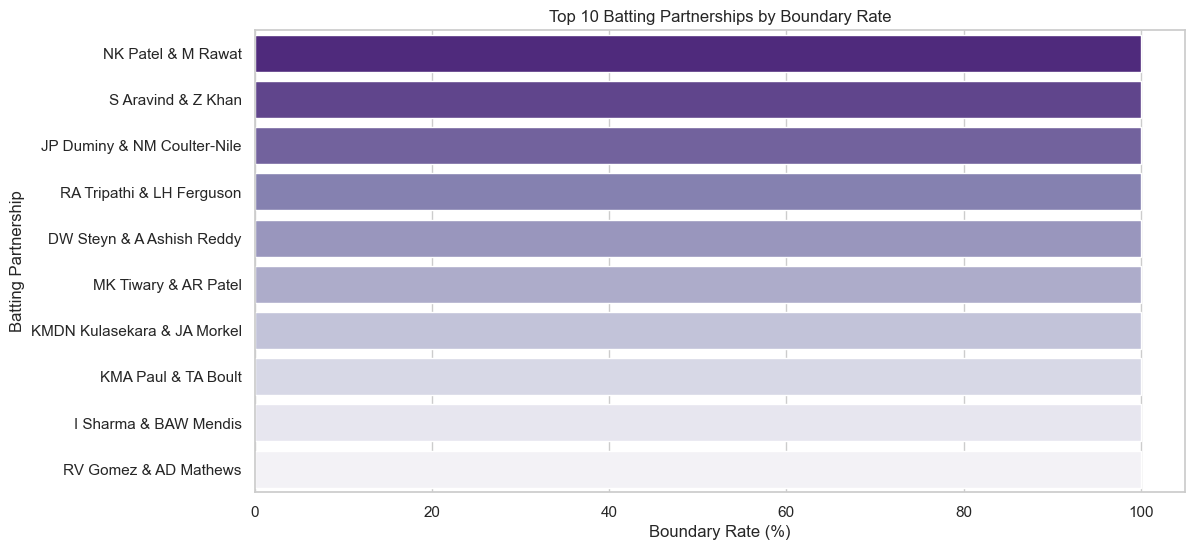

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x='boundary_rate', y='partnership', data=boundary_rate.head(10), palette="Purples_r")
plt.title('Top 10 Batting Partnerships by Boundary Rate')
plt.xlabel('Boundary Rate (%)')
plt.ylabel('Batting Partnership')
plt.show()

In [20]:
#  Total Matches Played 
team_stats = matches['team1'].value_counts() + matches['team2'].value_counts()


print(team_stats)
#team_stats.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/team_stats.csv', index=False)

Chennai Super Kings            238
Deccan Chargers                 75
Delhi Capitals                  91
Delhi Daredevils               161
Gujarat Lions                   30
Gujarat Titans                  45
Kings XI Punjab                190
Kochi Tuskers Kerala            14
Kolkata Knight Riders          251
Lucknow Super Giants            44
Mumbai Indians                 261
Pune Warriors                   46
Punjab Kings                    56
Rajasthan Royals               221
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    240
Royal Challengers Bengaluru     15
Sunrisers Hyderabad            182
dtype: int64


In [21]:
#  Total  Wins Per Team
team_wins = matches['winner'].value_counts()

print(team_wins)
#team_wins.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/team_wins.csv', index=False)

Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Lucknow Super Giants            24
Punjab Kings                    24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64


In [22]:
# #  Total Matches Played , Wins Per Team and Win %
df_team_comparison = pd.DataFrame({'Total Matches': team_stats, 'Wins': team_wins}).fillna(0)
df_team_comparison['Win Percentage'] = (df_team_comparison['Wins'] / df_team_comparison['Total Matches']) * 100

df_team_comparison = df_team_comparison.sort_values(by='Win Percentage', ascending=False)
print(df_team_comparison)
#df_team_comparison.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/df_team_comparison.csv', index=False)

                             Total Matches  Wins  Win Percentage
Rising Pune Supergiant                  16    10       62.500000
Gujarat Titans                          45    28       62.222222
Chennai Super Kings                    238   138       57.983193
Mumbai Indians                         261   144       55.172414
Lucknow Super Giants                    44    24       54.545455
Delhi Capitals                          91    48       52.747253
Kolkata Knight Riders                  251   131       52.191235
Rajasthan Royals                       221   112       50.678733
Sunrisers Hyderabad                    182    88       48.351648
Royal Challengers Bangalore            240   116       48.333333
Royal Challengers Bengaluru             15     7       46.666667
Kings XI Punjab                        190    88       46.315789
Gujarat Lions                           30    13       43.333333
Kochi Tuskers Kerala                    14     6       42.857143
Punjab Kings             

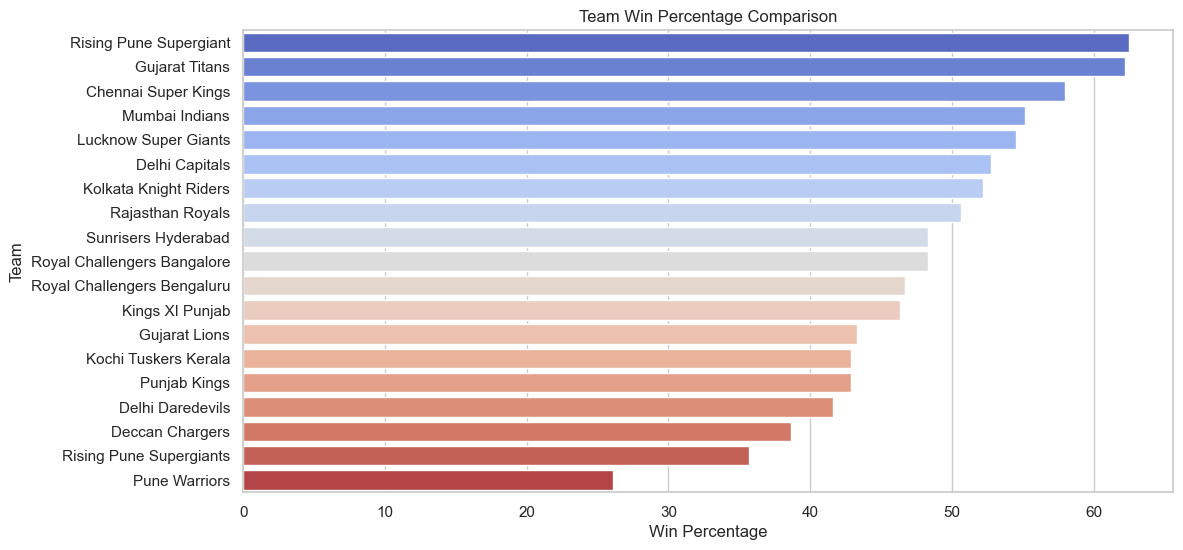

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(y=df_team_comparison.index, x=df_team_comparison['Win Percentage'], palette='coolwarm')
plt.title('Team Win Percentage Comparison')
plt.xlabel('Win Percentage')
plt.ylabel('Team')
plt.show()

In [24]:
#  Most Matches Won 
most_wins = team_wins.idxmax()
most_wins_count = team_wins.max()
print(most_wins)
print(most_wins_count)

Mumbai Indians
144


In [25]:
#Venue wins by each team
venue_wins = matches.groupby('venue')['winner'].value_counts().unstack().fillna(0)
print(venue_wins)

winner                                              Chennai Super Kings  \
venue                                                                     
Arun Jaitley Stadium                                                1.0   
Arun Jaitley Stadium, Delhi                                         2.0   
Barabati Stadium                                                    0.0   
Barsapara Cricket Stadium, Guwahati                                 0.0   
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cr...                  0.0   
Brabourne Stadium                                                   1.0   
Brabourne Stadium, Mumbai                                           0.0   
Buffalo Park                                                        1.0   
De Beers Diamond Oval                                               1.0   
Dr DY Patil Sports Academy                                          3.0   
Dr DY Patil Sports Academy, Mumbai                                  3.0   
Dr. Y.S. Rajasekhara Redd

In [26]:
#Matches Played Per Venue
venue_match_counts = matches['venue'].value_counts()
print(venue_match_counts)
#venue_match_counts.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/venue_match_counts.csv', index=False)

Eden Gardens                                                             77
Wankhede Stadium                                                         73
M Chinnaswamy Stadium                                                    65
Feroz Shah Kotla                                                         60
Rajiv Gandhi International Stadium, Uppal                                49
MA Chidambaram Stadium, Chepauk                                          48
Sawai Mansingh Stadium                                                   47
Dubai International Cricket Stadium                                      46
Wankhede Stadium, Mumbai                                                 45
Punjab Cricket Association Stadium, Mohali                               35
Sheikh Zayed Stadium                                                     29
Sharjah Cricket Stadium                                                  28
MA Chidambaram Stadium, Chepauk, Chennai                                 28
Narendra Mod

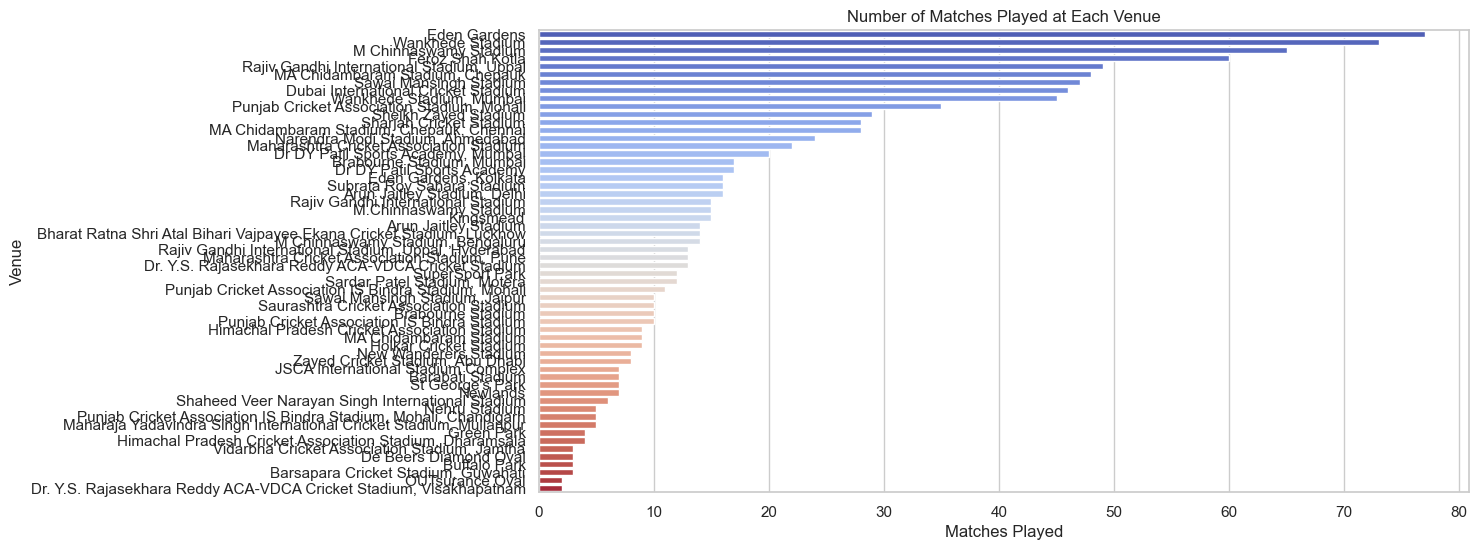

In [27]:

plt.figure(figsize=(12, 6))
sns.barplot(y=venue_match_counts.index, x=venue_match_counts.values, palette='coolwarm')
plt.title('Number of Matches Played at Each Venue')
plt.xlabel('Matches Played')
plt.ylabel('Venue')
plt.show()

In [28]:
# Average Run Rate of teams 
deliveries['total_runs'] = deliveries['batsman_runs'] + deliveries['extra_runs']
run_rates = deliveries.groupby(['match_id', 'batting_team']).agg({'total_runs': 'sum', 'ball': 'count'}).reset_index()
run_rates['run_rate'] = (run_rates['total_runs'] / run_rates['ball']) * 6
avg_run_rates = run_rates.groupby('batting_team')['run_rate'].mean().reset_index()
print(avg_run_rates)
#avg_run_rates.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/avg_run_rates.csv', index=False)

                   batting_team  run_rate
0           Chennai Super Kings  8.082967
1               Deccan Chargers  7.621983
2                Delhi Capitals  8.192777
3              Delhi Daredevils  7.777884
4                 Gujarat Lions  8.212650
5                Gujarat Titans  8.460785
6               Kings XI Punjab  7.984467
7          Kochi Tuskers Kerala  7.438340
8         Kolkata Knight Riders  8.015359
9          Lucknow Super Giants  8.299351
10               Mumbai Indians  8.067291
11                Pune Warriors  7.006176
12                 Punjab Kings  8.393908
13             Rajasthan Royals  7.951568
14       Rising Pune Supergiant  7.751077
15      Rising Pune Supergiants  7.772144
16  Royal Challengers Bangalore  8.031171
17  Royal Challengers Bengaluru  9.722089
18          Sunrisers Hyderabad  8.017993


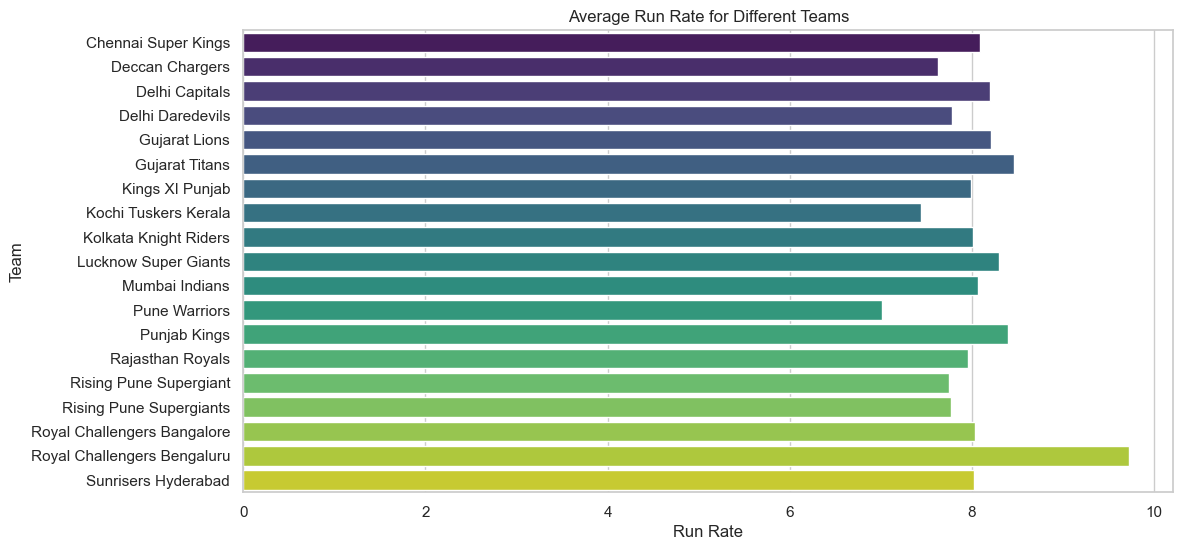

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(y=avg_run_rates['batting_team'], x=avg_run_rates['run_rate'], palette='viridis')
plt.title('Average Run Rate for Different Teams')
plt.xlabel('Run Rate')
plt.ylabel('Team')
plt.show()


In [30]:
# Average Run Rate of players 
player_run_rates = deliveries.groupby(['batter']).agg({'total_runs': 'sum', 'ball': 'count'}).reset_index()
player_run_rates['run_rate'] = (player_run_rates['total_runs'] / player_run_rates['ball']) * 6
player_run_rates = player_run_rates.sort_values(by='run_rate', ascending=False).head(10)
print(player_run_rates)
#player_run_rates.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/player_run_rates.csv', index=False)

              batter  total_runs  ball   run_rate
312           L Wood           9     3  18.000000
461    R Sai Kishore          17     6  17.000000
97        B Stanlake           5     2  15.000000
234  J Fraser-McGurk         348   150  13.920000
629         Umar Gul          44    19  13.894737
293  KMDN Kulasekara           6     3  12.000000
497         RS Sodhi           4     2  12.000000
186       ER Dwivedi          29    15  11.600000
465       R Shepherd         123    68  10.852941
410       Naman Dhir         151    84  10.785714


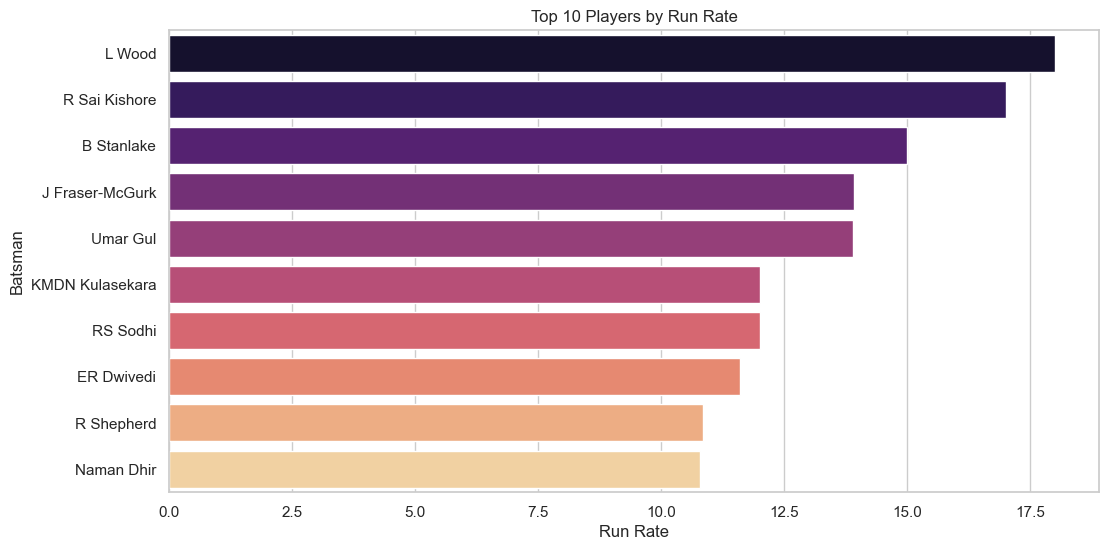

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(y=player_run_rates['batter'], x=player_run_rates['run_rate'], palette='magma')
plt.title('Top 10 Players by Run Rate')
plt.xlabel('Run Rate')
plt.ylabel('Batsman')
plt.show()

In [32]:
#Teams scoring runs over the years
scoring_over_years = matches.merge(deliveries, left_on='id', right_on='match_id')
teams_scoring = scoring_over_years.groupby(['season', 'batting_team'])['total_runs'].sum().reset_index()
print(teams_scoring)
#teams_scoring.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/teams_scoring.csv', index=False)

      season                 batting_team  total_runs
0    2007/08          Chennai Super Kings        2520
1    2007/08              Deccan Chargers        2229
2    2007/08             Delhi Daredevils        2118
3    2007/08              Kings XI Punjab        2464
4    2007/08        Kolkata Knight Riders        1942
..       ...                          ...         ...
141     2024               Mumbai Indians        2568
142     2024                 Punjab Kings        2487
143     2024             Rajasthan Royals        2647
144     2024  Royal Challengers Bengaluru        2930
145     2024          Sunrisers Hyderabad        3052

[146 rows x 3 columns]


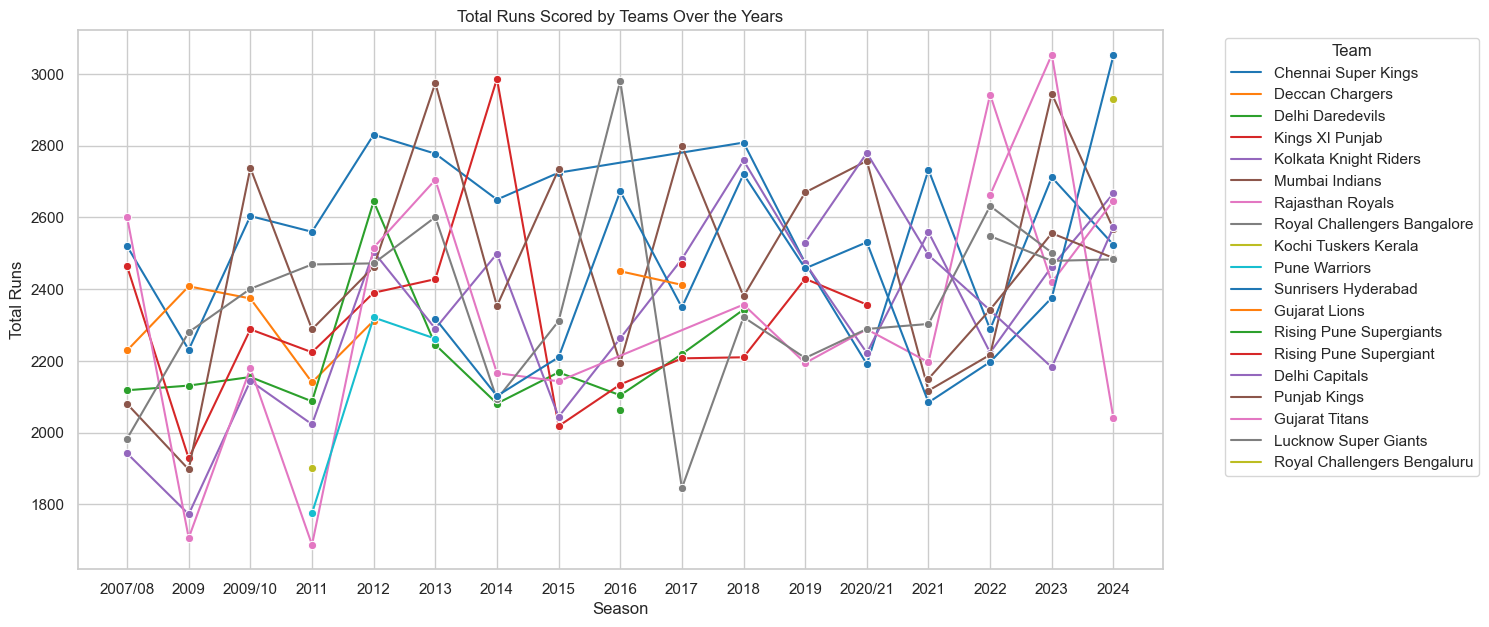

In [33]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=teams_scoring, x='season', y='total_runs', hue='batting_team', marker='o', palette='tab10')
plt.title('Total Runs Scored by Teams Over the Years')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [34]:
# Team winning in each season
scoring_over_years = matches.groupby(['season', 'winner'])['id'].count().reset_index()
scoring_over_years.rename(columns={'id': 'matches_won'}, inplace=True)
print(scoring_over_years)
#scoring_over_years.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/scoring_over_years.csv', index=False)

      season                       winner  matches_won
0    2007/08          Chennai Super Kings            9
1    2007/08              Deccan Chargers            2
2    2007/08             Delhi Daredevils            7
3    2007/08              Kings XI Punjab           10
4    2007/08        Kolkata Knight Riders            6
..       ...                          ...          ...
141     2024               Mumbai Indians            4
142     2024                 Punjab Kings            5
143     2024             Rajasthan Royals            9
144     2024  Royal Challengers Bengaluru            7
145     2024          Sunrisers Hyderabad            9

[146 rows x 3 columns]


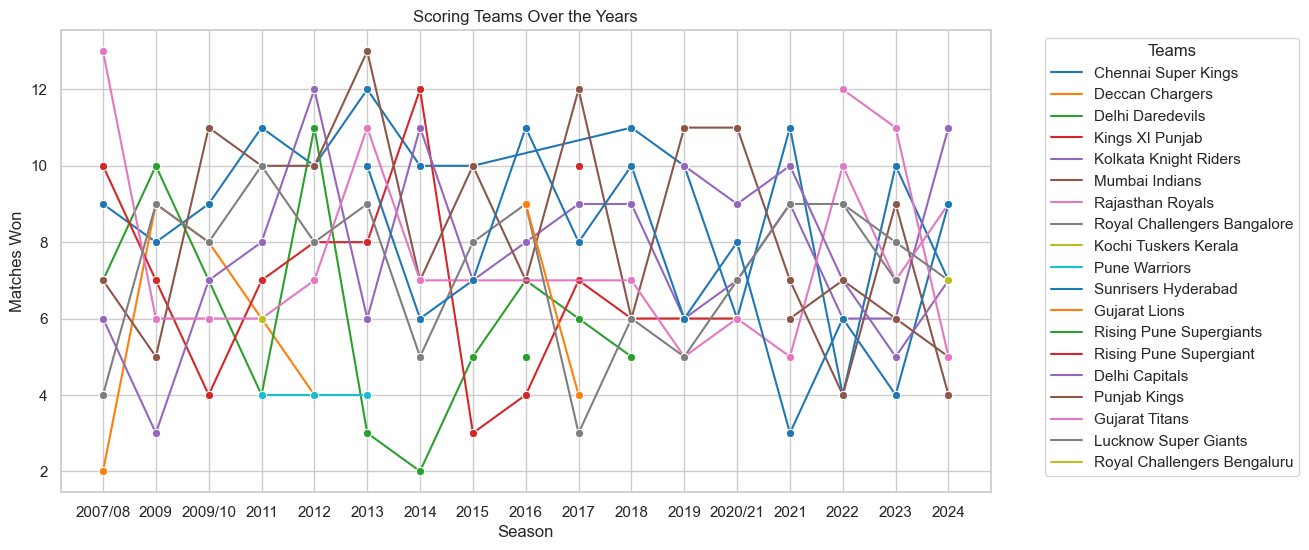

In [35]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=scoring_over_years, x='season', y='matches_won', hue='winner', marker='o', palette='tab10')
plt.title('Scoring Teams Over the Years')
plt.xlabel('Season')
plt.ylabel('Matches Won')
plt.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [36]:
# First ball of IPL history
seasons = matches['season'].unique()
first_ball = deliveries.sort_values(['match_id', 'inning', 'over', 'ball']).iloc[0]

print("Seasons List:", seasons)
print("First Ball of IPL History:", first_ball[['match_id', 'inning', 'over', 'ball', 'batter', 'bowler', 'total_runs']])

Seasons List: ['2007/08' '2009' '2009/10' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' '2018' '2019' '2020/21' '2021' '2022' '2023' '2024']
First Ball of IPL History: match_id          335982
inning                 1
over                   0
ball                   1
batter        SC Ganguly
bowler           P Kumar
total_runs             1
Name: 0, dtype: object


In [37]:
# Season wise matches
season_wise_matches = matches.groupby('season')['id'].count()
print(season_wise_matches)
#season_wise_matches.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/season_wise_matches.csv', index=False)

season
2007/08    58
2009       57
2009/10    60
2011       73
2012       74
2013       76
2014       60
2015       59
2016       60
2017       59
2018       60
2019       60
2020/21    60
2021       60
2022       74
2023       74
2024       71
Name: id, dtype: int64


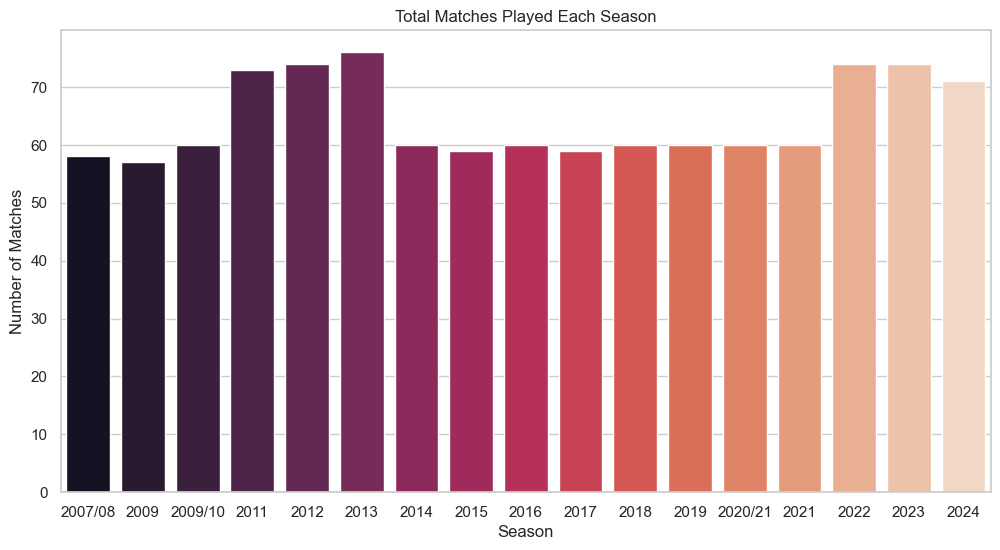

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x=season_wise_matches.index, y=season_wise_matches.values, palette='rocket')
plt.title('Total Matches Played Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.show()

In [39]:

#  Most Runs Scored by an IPL Team
total_runs_team = deliveries.groupby('batting_team')['total_runs'].sum().reset_index()
total_runs_team = total_runs_team.sort_values(by='total_runs', ascending=False)
print(total_runs_team)
#total_runs_team.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/total_runs_team.csv', index=False)

                   batting_team  total_runs
10               Mumbai Indians       42176
8         Kolkata Knight Riders       39331
0           Chennai Super Kings       38629
16  Royal Challengers Bangalore       37692
13             Rajasthan Royals       34747
6               Kings XI Punjab       30064
18          Sunrisers Hyderabad       29071
3              Delhi Daredevils       24296
2                Delhi Capitals       14900
1               Deccan Chargers       11463
12                 Punjab Kings        9536
5                Gujarat Titans        7757
9          Lucknow Super Giants        7510
11                Pune Warriors        6358
4                 Gujarat Lions        4862
17  Royal Challengers Bengaluru        2930
14       Rising Pune Supergiant        2470
15      Rising Pune Supergiants        2063
7          Kochi Tuskers Kerala        1901


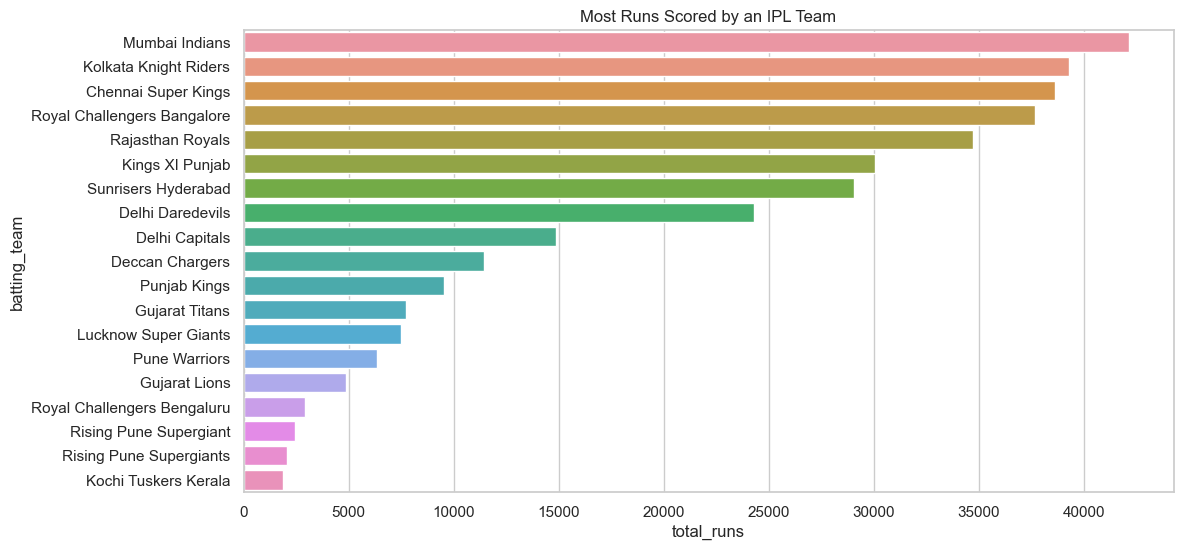

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(x='total_runs', y='batting_team', data=total_runs_team)
plt.title('Most Runs Scored by an IPL Team')
plt.show()

In [41]:
# Most IPL Runs, Centuries and Half-Centuries by a Player
player_runs = deliveries.groupby('batter')['total_runs'].sum().reset_index()


match_scores = deliveries.groupby(['batter', 'match_id'])['batsman_runs'].sum().reset_index()

match_scores['century'] = match_scores['batsman_runs'] >= 100
match_scores['half_century'] = match_scores['batsman_runs'].between(50, 99)

player_centuries = match_scores.groupby('batter')['century'].sum().reset_index()
#player_centuries.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/player_centuries.csv', index=False)
player_half_centuries = match_scores.groupby('batter')['half_century'].sum().reset_index()
#player_half_centuries.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/player_half_centuries.csv', index=False)

player_stats = player_runs.merge(player_centuries, on='batter', how='left').merge(player_half_centuries, on='batter', how='left')
player_stats.fillna(0, inplace=True)  # Fill NaN values with 0
player_stats = player_stats.sort_values(by='century', ascending=False)


print(player_stats)
#player_stats.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/player_stats.csv', index=False)


              batter  total_runs  century  half_century
631          V Kohli        8307        8            56
242       JC Buttler        3773        7            19
124         CH Gayle        5336        6            32
592     Shubman Gill        3327        4            20
289         KL Rahul        4887        4            37
..               ...         ...      ...           ...
235        J Suchith          76        0             0
236  J Syed Mohammad          30        0             0
237         J Theron          11        0             0
238          J Yadav          42        0             0
672           Z Khan         121        0             0

[673 rows x 4 columns]


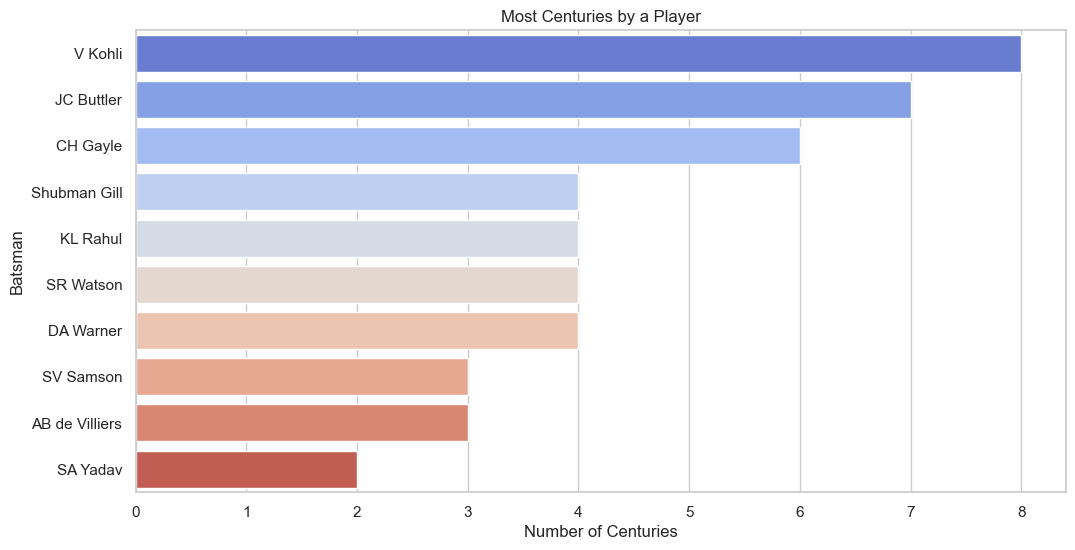

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(x='century', y='batter', data=player_stats.head(10), palette='coolwarm')
plt.title('Most Centuries by a Player')
plt.xlabel('Number of Centuries')
plt.ylabel('Batsman')
plt.show()



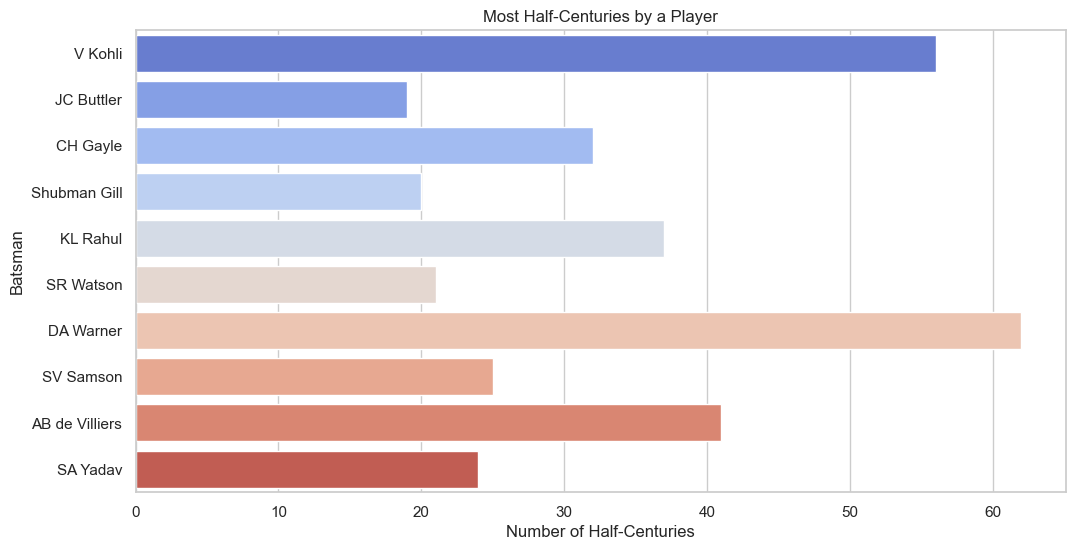

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(x='half_century', y='batter', data=player_stats.head(10), palette='coolwarm')
plt.title('Most Half-Centuries by a Player')
plt.xlabel('Number of Half-Centuries')
plt.ylabel('Batsman')
plt.show()

In [44]:
#Most runs in a season and orange cap winners of each season
season_runs = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id')

season_runs = season_runs.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()

orange_cap = season_runs.loc[season_runs.groupby('season')['batsman_runs'].idxmax()]

print(orange_cap)
#orange_cap.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/orange_cap.csv', index=False)


       season         batter  batsman_runs
115   2007/08       SE Marsh           616
229      2009      ML Hayden           572
446   2009/10   SR Tendulkar           618
502      2011       CH Gayle           608
684      2012       CH Gayle           733
910      2013     MEK Hussey           733
1088     2014     RV Uthappa           660
1148     2015      DA Warner           562
1383     2016        V Kohli           973
1422     2017      DA Warner           641
1594     2018  KS Williamson           735
1694     2019      DA Warner           692
1866  2020/21       KL Rahul           676
2051     2021     RD Gaikwad           635
2144     2022     JC Buttler           863
2423     2023   Shubman Gill           890
2606     2024        V Kohli           741


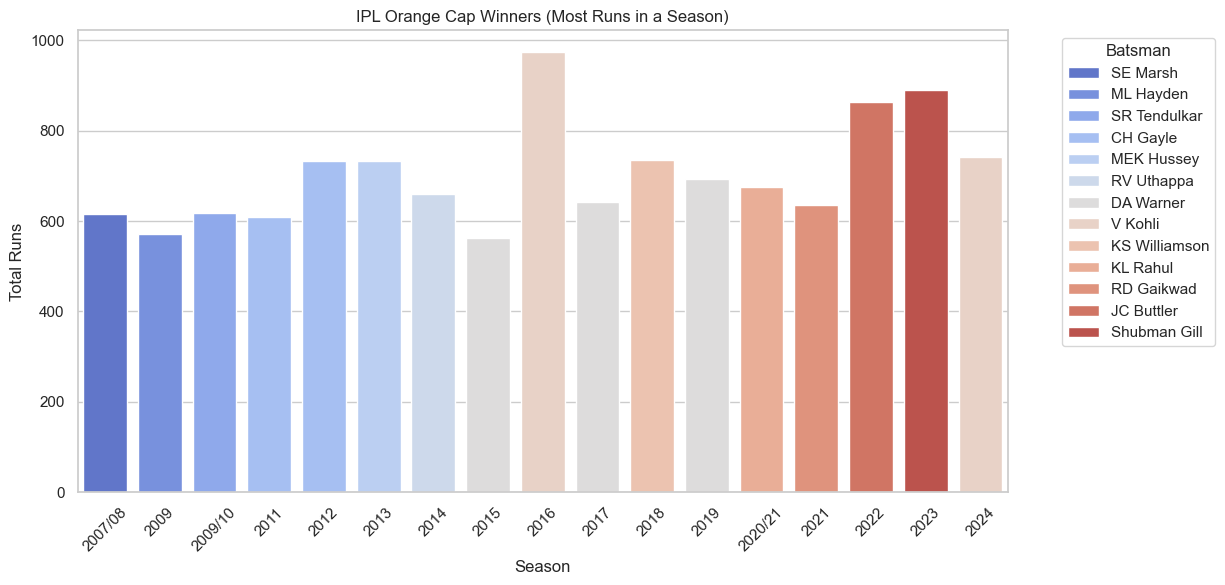

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='batsman_runs', hue='batter', data=orange_cap, dodge=False, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('IPL Orange Cap Winners (Most Runs in a Season)')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.legend(title='Batsman', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [46]:
# Most Sixes and Fours by a Player
sixes_fours = deliveries.copy()
sixes_fours['six'] = (sixes_fours['batsman_runs'] == 6).astype(int)
sixes_fours['four'] = (sixes_fours['batsman_runs'] == 4).astype(int)

player_sixes_fours = sixes_fours.groupby('batter')[['six', 'four']].sum().reset_index()
player_sixes_fours = player_sixes_fours.sort_values(by='six', ascending=False)

print(player_sixes_fours)
#player_sixes_fours.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/player_sixes_fours.csv', index=False)


                batter  six  four
124           CH Gayle  359   408
477          RG Sharma  281   599
631            V Kohli  273   708
30      AB de Villiers  253   414
374           MS Dhoni  252   363
..                 ...  ...   ...
181           DT Patil    0     1
482         RJW Topley    0     0
483            RK Bhui    0     0
179         DS Lehmann    0     3
336  M Prasidh Krishna    0     0

[673 rows x 3 columns]


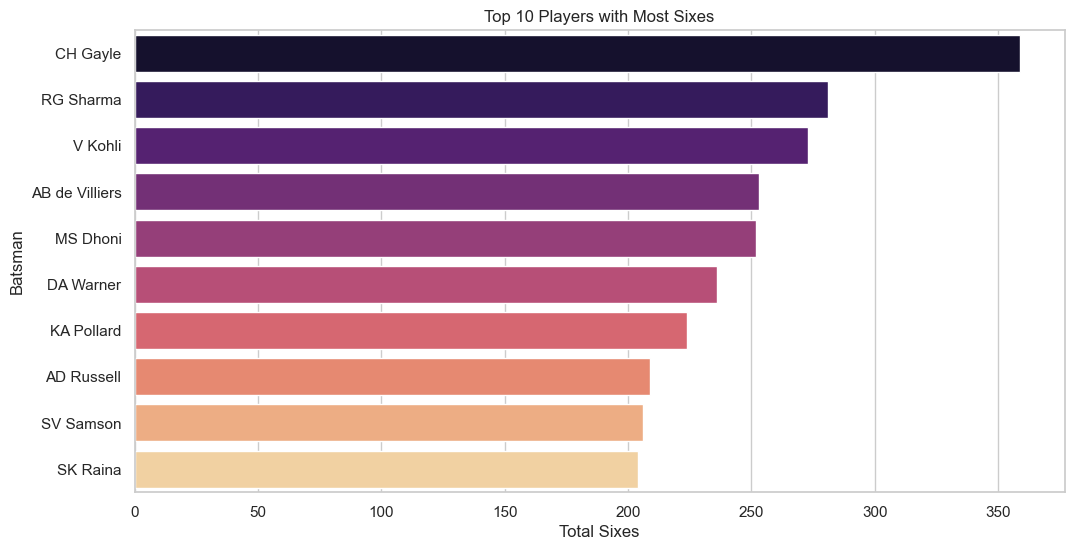

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(x='six', y='batter', data=player_sixes_fours.head(10), palette='magma')
plt.title('Top 10 Players with Most Sixes')
plt.xlabel('Total Sixes')
plt.ylabel('Batsman')
plt.show()



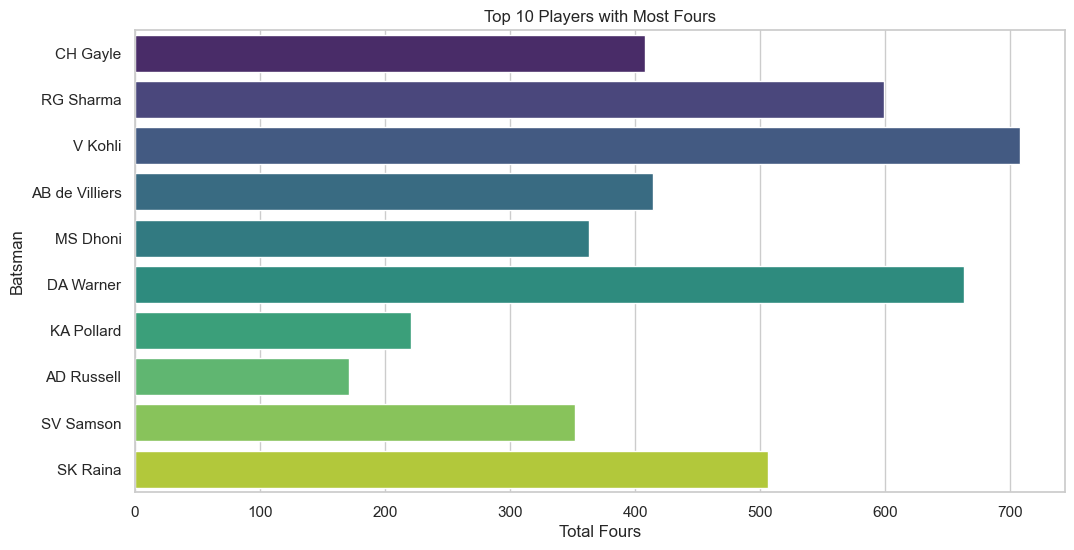

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(x='four', y='batter', data=player_sixes_fours.head(10), palette='viridis')
plt.title('Top 10 Players with Most Fours')
plt.xlabel('Total Fours')
plt.ylabel('Batsman')
plt.show()

In [49]:
# Highest total in an IPL match by a team
highest_totals = deliveries.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
highest_totals = highest_totals.sort_values(by='total_runs', ascending=False)

print(highest_totals)
#highest_totals.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/highest_totals.csv', index=False)


      match_id                 batting_team  total_runs
2104   1426268          Sunrisers Hyderabad         287
2060   1422126          Sunrisers Hyderabad         277
2076   1422134        Kolkata Knight Riders         272
2114   1426273          Sunrisers Hyderabad         266
702     598027  Royal Challengers Bangalore         263
...        ...                          ...         ...
1205   1082617  Royal Challengers Bangalore          49
1264   1082648        Kolkata Knight Riders          48
858     733993          Sunrisers Hyderabad          44
1486   1178424             Rajasthan Royals          41
1021    829813  Royal Challengers Bangalore           2

[2187 rows x 3 columns]


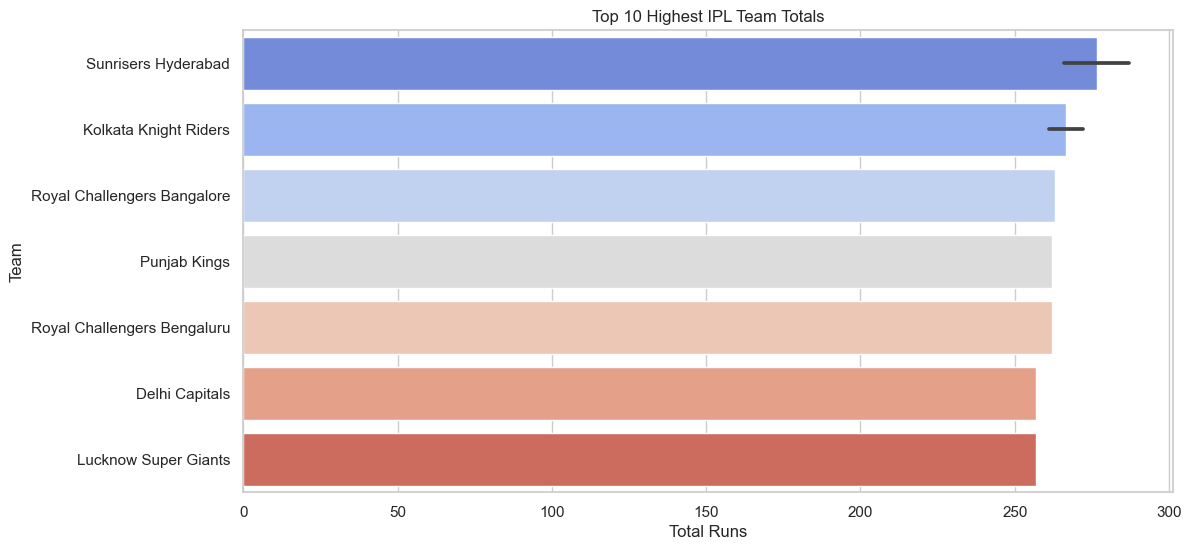

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(x='total_runs', y='batting_team', data=highest_totals.head(10), palette='coolwarm')
plt.title('Top 10 Highest IPL Team Totals')
plt.xlabel('Total Runs')
plt.ylabel('Team')
plt.show()

In [51]:
# Most runs conceded by a bowler in a single match
bowler_runs = deliveries.groupby(['match_id', 'bowler'])['total_runs'].sum().reset_index()
bowler_runs = bowler_runs.sort_values(by='total_runs', ascending=False)
print(bowler_runs)
#bowler_runs.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/bowler_runs.csv', index=False)



       match_id        bowler  total_runs
12594   1426278     MM Sharma          73
8169    1136611  Basil Thampi          70
11379   1359487    Yash Dayal          69
12633   1426281        L Wood          68
12475   1426268    RJW Topley          68
...         ...           ...         ...
2209     501205     DP Nannes           0
8287    1175356      DJ Bravo           0
7776    1136578        N Rana           0
11674   1359512      A Badoni           0
657      336038     RA Jadeja           0

[12978 rows x 3 columns]


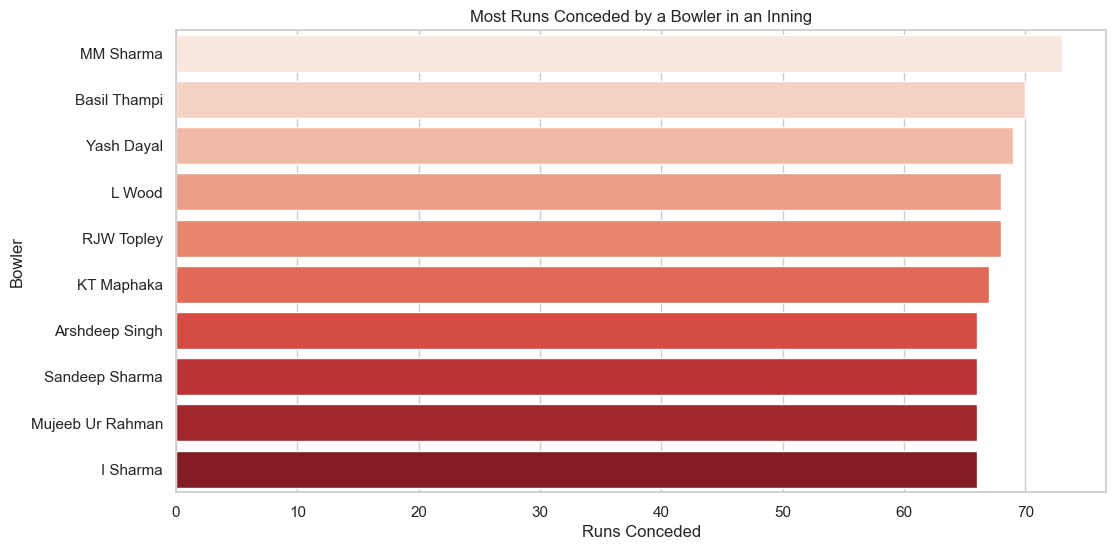

In [52]:
plt.figure(figsize=(12, 6))
sns.barplot(x='total_runs', y='bowler', data=bowler_runs.head(10), palette='Reds')
plt.title('Most Runs Conceded by a Bowler in an Inning')
plt.xlabel('Runs Conceded')
plt.ylabel('Bowler')
plt.show()

In [53]:
# Most wickets in a season and purple cap winner
season_wickets = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id')

season_wickets = season_wickets[season_wickets['player_dismissed'].notna()]
season_wickets = season_wickets.groupby(['season', 'bowler'])['player_dismissed'].count().reset_index()

purple_cap = season_wickets.loc[season_wickets.groupby('season')['player_dismissed'].idxmax()]
print(purple_cap)
#purple_cap.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/purple_cap.csv', index=False)


       season         bowler  player_dismissed
77    2007/08  Sohail Tanvir                24
157      2009       RP Singh                26
248   2009/10        PP Ojha                22
375      2011     SL Malinga                30
447      2012       M Morkel                30
519      2013       DJ Bravo                34
650      2014      MM Sharma                26
708      2015       DJ Bravo                28
791      2016        B Kumar                24
879      2017        B Kumar                28
962      2018         AJ Tye                28
1077     2019       K Rabada                29
1161  2020/21       K Rabada                32
1232     2021       HV Patel                35
1402     2022      YS Chahal                29
1469     2023      MM Sharma                31
1542     2024       HV Patel                30


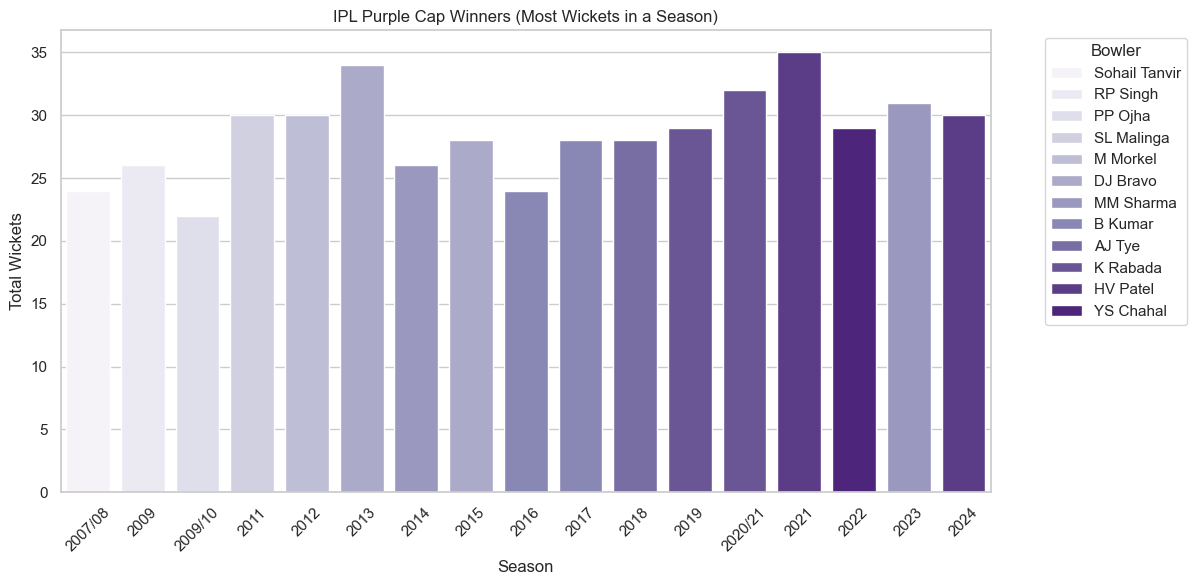

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='player_dismissed', hue='bowler', data=purple_cap, dodge=False, palette='Purples')
plt.xticks(rotation=45)
plt.title('IPL Purple Cap Winners (Most Wickets in a Season)')
plt.xlabel('Season')
plt.ylabel('Total Wickets')
plt.legend(title='Bowler', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [55]:
# Maiden overs per bowler
maiden_overs = deliveries.groupby(['bowler', 'match_id', 'over'])['total_runs'].sum().reset_index()
maiden_overs = maiden_overs[maiden_overs['total_runs'] == 0]  # Only maiden overs
maiden_overs_count = maiden_overs.groupby('bowler').size().reset_index(name='maiden_overs')
maiden_overs_count = maiden_overs_count.sort_values(by='maiden_overs', ascending=False)
print(maiden_overs_count)
#maiden_overs_count.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/maiden_overs_count.csv', index=False)




             bowler  maiden_overs
94          P Kumar            12
18          B Kumar            11
45        IK Pathan             9
141        TA Boult             9
127      SL Malinga             8
..              ...           ...
66          L Ngidi             1
63           KR Sen             1
59        K Gowtham             1
58      JW Hastings             1
78   MJ McClenaghan             1

[157 rows x 2 columns]


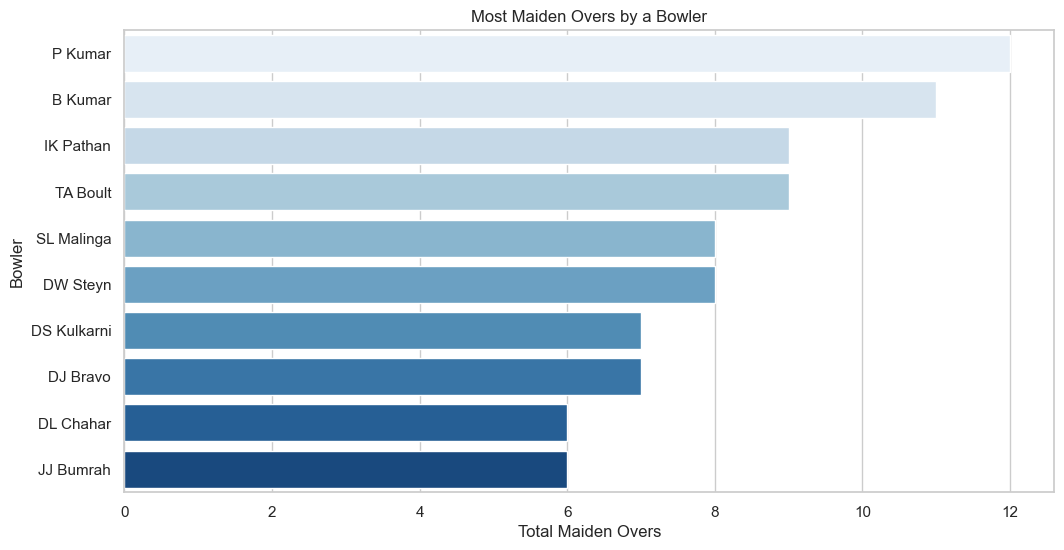

In [56]:
plt.figure(figsize=(12, 6))
sns.barplot(x='maiden_overs', y='bowler', data=maiden_overs_count.head(10), palette='Blues')
plt.title('Most Maiden Overs by a Bowler')
plt.xlabel('Total Maiden Overs')
plt.ylabel('Bowler')
plt.show()

In [57]:
# Extra runs conceded by teams
extra_runs = deliveries.groupby('bowling_team')['extra_runs'].sum().reset_index()
extra_runs = extra_runs.sort_values(by='extra_runs', ascending=False)
print(extra_runs)
#extra_runs.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/extra_runs.csv', index=False)



                   bowling_team  extra_runs
10               Mumbai Indians        2295
16  Royal Challengers Bangalore        2040
8         Kolkata Knight Riders        1957
13             Rajasthan Royals        1917
0           Chennai Super Kings        1842
6               Kings XI Punjab        1571
3              Delhi Daredevils        1268
18          Sunrisers Hyderabad        1254
2                Delhi Capitals         725
1               Deccan Chargers         659
12                 Punjab Kings         480
9          Lucknow Super Giants         386
11                Pune Warriors         335
5                Gujarat Titans         295
4                 Gujarat Lions         188
17  Royal Challengers Bengaluru         151
14       Rising Pune Supergiant         111
7          Kochi Tuskers Kerala         110
15      Rising Pune Supergiants         108


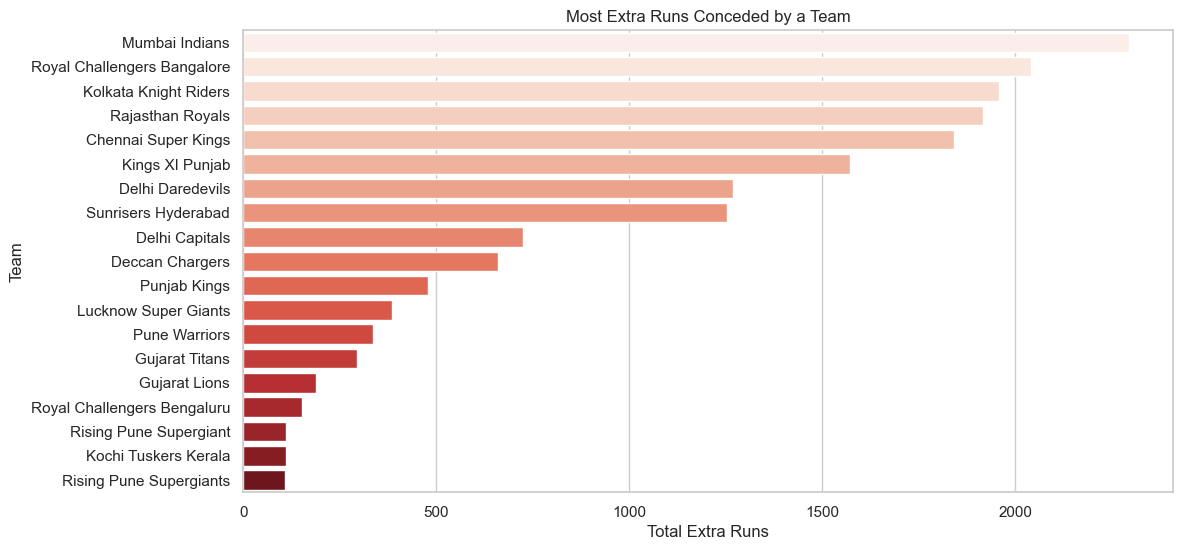

In [58]:
plt.figure(figsize=(12, 6))
sns.barplot(x='extra_runs', y='bowling_team', data=extra_runs, palette='Reds')
plt.title('Most Extra Runs Conceded by a Team')
plt.xlabel('Total Extra Runs')
plt.ylabel('Team')
plt.show()

In [59]:
# Team win percentage
team_wins = matches.groupby('winner').size().reset_index(name='wins')
total_matches = matches['team1'].value_counts() + matches['team2'].value_counts()
win_probability = team_wins.merge(total_matches.reset_index(), left_on='winner', right_on='index')
win_probability['win_percentage'] = (win_probability['wins'] / win_probability[0]) * 100
print(win_probability)

#win_probability.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/win_probability.csv', index=False)



                         winner  wins                        index    0  \
0           Chennai Super Kings   138          Chennai Super Kings  238   
1               Deccan Chargers    29              Deccan Chargers   75   
2                Delhi Capitals    48               Delhi Capitals   91   
3              Delhi Daredevils    67             Delhi Daredevils  161   
4                 Gujarat Lions    13                Gujarat Lions   30   
5                Gujarat Titans    28               Gujarat Titans   45   
6               Kings XI Punjab    88              Kings XI Punjab  190   
7          Kochi Tuskers Kerala     6         Kochi Tuskers Kerala   14   
8         Kolkata Knight Riders   131        Kolkata Knight Riders  251   
9          Lucknow Super Giants    24         Lucknow Super Giants   44   
10               Mumbai Indians   144               Mumbai Indians  261   
11                Pune Warriors    12                Pune Warriors   46   
12                 Punjab

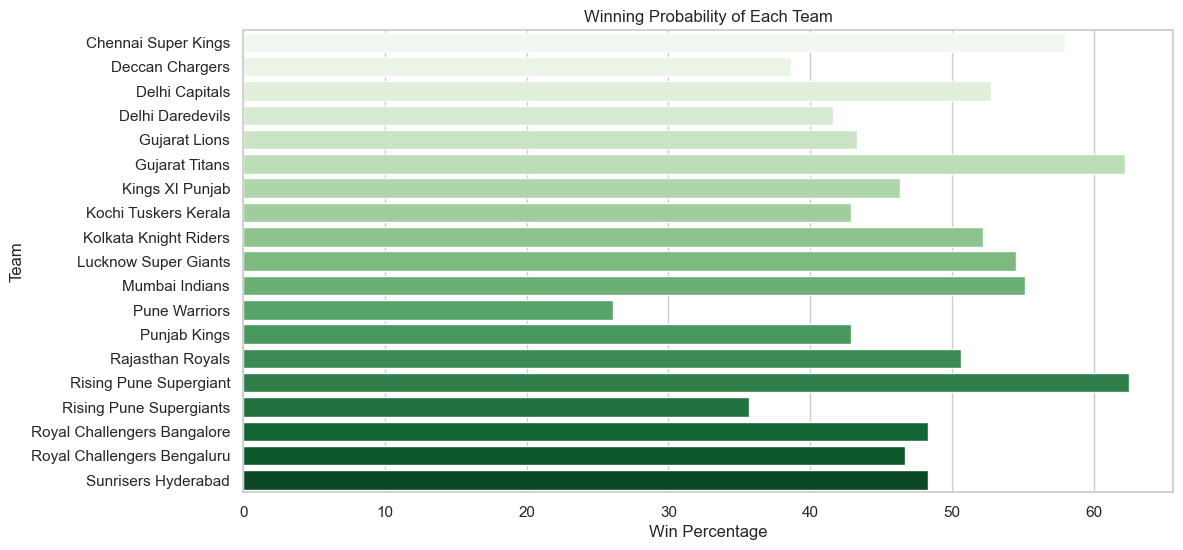

In [60]:

plt.figure(figsize=(12, 6))
sns.barplot(x='win_percentage', y='winner', data=win_probability, palette='Greens')
plt.title('Winning Probability of Each Team')
plt.xlabel('Win Percentage')
plt.ylabel('Team')
plt.show()

In [61]:
# Checking player loyalty
player_season = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id')
player_season = player_season.groupby(['batter', 'batting_team'])['season'].nunique().reset_index()
loyal_players = player_season[player_season['season'] >= 10]
loyal_players = loyal_players.sort_values(by='season', ascending=False)
print(loyal_players)
#loyal_players.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/loyal_players.csv', index=False)


               batter                 batting_team  season
1224          V Kohli  Royal Challengers Bangalore      16
739          MS Dhoni          Chennai Super Kings      15
955         RG Sharma               Mumbai Indians      14
529        KA Pollard               Mumbai Indians      13
1104        SP Narine        Kolkata Knight Riders      13
52     AB de Villiers  Royal Challengers Bangalore      11
173           B Kumar          Sunrisers Hyderabad      11
938         RA Jadeja          Chennai Super Kings      11
1074         SK Raina          Chennai Super Kings      11
68         AD Russell        Kolkata Knight Riders      10
292          DJ Bravo          Chennai Super Kings      10
413   Harbhajan Singh               Mumbai Indians      10
1130        SV Samson             Rajasthan Royals      10


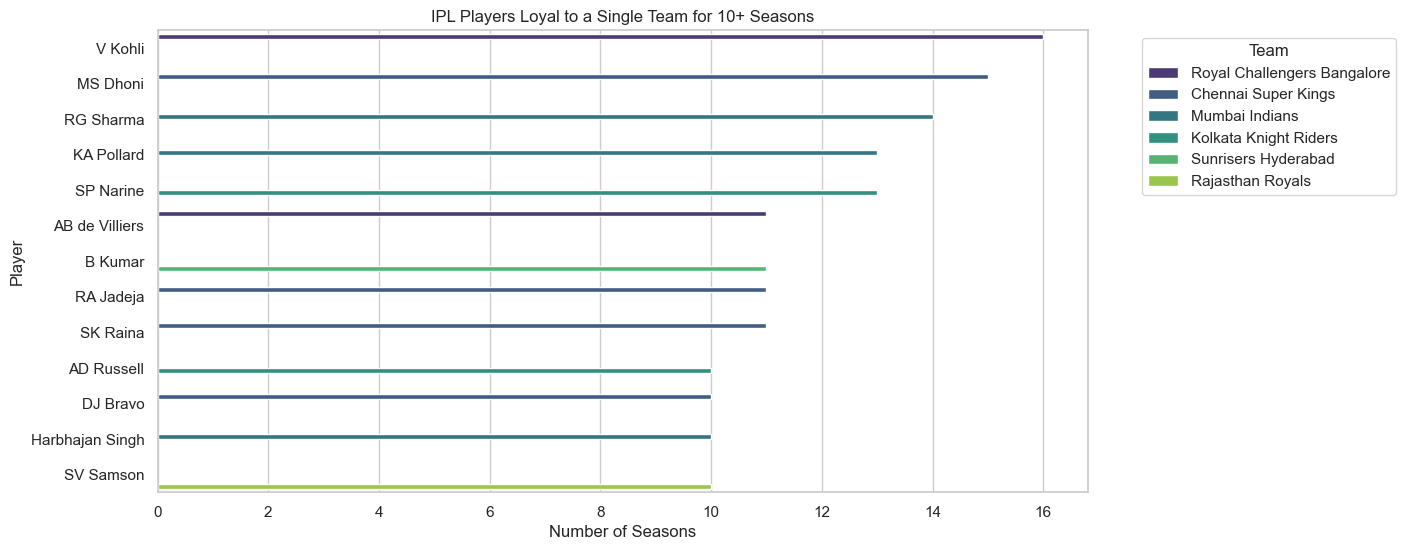

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='batter', hue='batting_team', data=loyal_players, palette='viridis')

plt.xlabel('Number of Seasons')
plt.ylabel('Player')
plt.title('IPL Players Loyal to a Single Team for 10+ Seasons')
plt.legend(title="Team", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.show()


In [63]:
#  Team with the Most Match Wins
team_wins = matches['winner'].value_counts().reset_index()
team_wins.columns = ['Team', 'Total Wins']
print(team_wins)
#team_wins.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/loyal_players.csv', index=False)


                           Team  Total Wins
0                Mumbai Indians         144
1           Chennai Super Kings         138
2         Kolkata Knight Riders         131
3   Royal Challengers Bangalore         116
4              Rajasthan Royals         112
5               Kings XI Punjab          88
6           Sunrisers Hyderabad          88
7              Delhi Daredevils          67
8                Delhi Capitals          48
9               Deccan Chargers          29
10               Gujarat Titans          28
11         Lucknow Super Giants          24
12                 Punjab Kings          24
13                Gujarat Lions          13
14                Pune Warriors          12
15       Rising Pune Supergiant          10
16  Royal Challengers Bengaluru           7
17         Kochi Tuskers Kerala           6
18      Rising Pune Supergiants           5


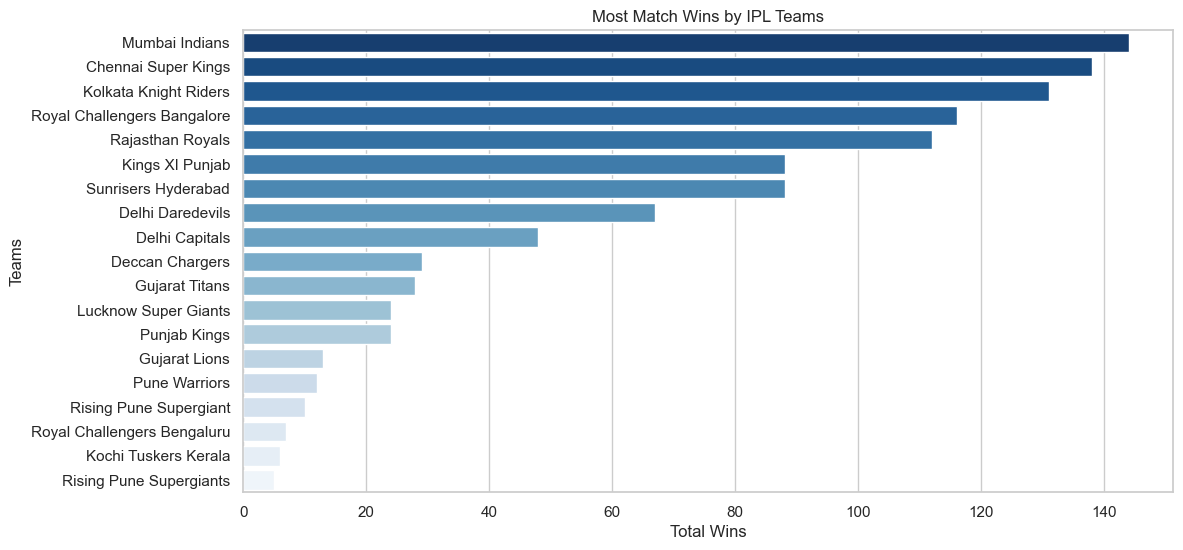

In [64]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Wins', y='Team', data=team_wins, palette='Blues_r')
plt.title('Most Match Wins by IPL Teams')
plt.xlabel('Total Wins')
plt.ylabel('Teams')
plt.show()

In [65]:


# . Team with the Most IPL Titles (Finding final matches)
final_matches = matches.drop_duplicates(subset=['season'], keep='last')  # Assuming last match per season is the final
ipl_titles = final_matches['winner'].value_counts().reset_index()
ipl_titles.columns = ['Team', 'Total Titles']
print(ipl_titles)
#ipl_titles.to_csv('C:/Users/Asus/Downloads/Shaan_IPL/ipl_titles.csv', index=False)


                    Team  Total Titles
0    Chennai Super Kings             5
1         Mumbai Indians             5
2  Kolkata Knight Riders             3
3       Rajasthan Royals             1
4        Deccan Chargers             1
5    Sunrisers Hyderabad             1
6         Gujarat Titans             1


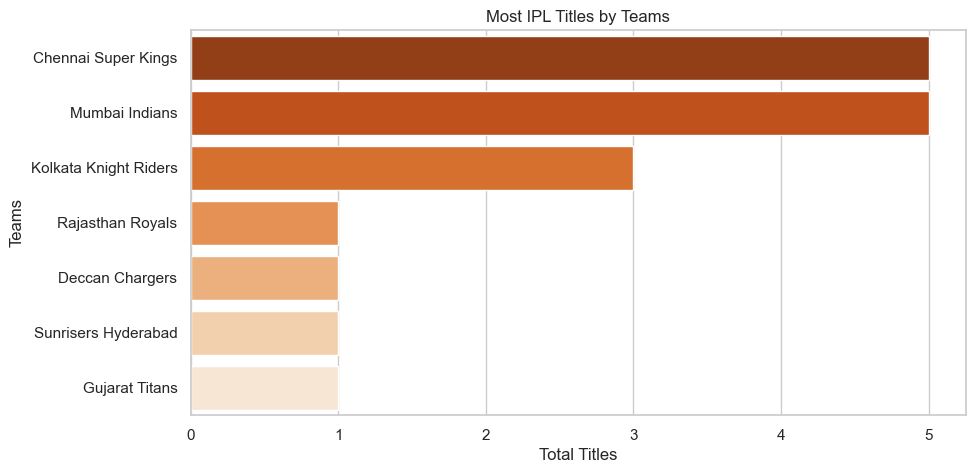

In [66]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Total Titles', y='Team', data=ipl_titles, palette='Oranges_r')
plt.title('Most IPL Titles by Teams')
plt.xlabel('Total Titles')
plt.ylabel('Teams')
plt.show()

In [67]:
#  Teams That  Won the IPL
all_teams = set(matches['team1']).union(set(matches['team2']))
winning_teams = set(ipl_titles['Team'])

print(winning_teams)

{'Chennai Super Kings', 'Mumbai Indians', 'Sunrisers Hyderabad', 'Deccan Chargers', 'Gujarat Titans', 'Kolkata Knight Riders', 'Rajasthan Royals'}


In [68]:
# #  Teams That Never Won the IPL
never_won_teams = all_teams - winning_teams
print(never_won_teams)

{'Royal Challengers Bengaluru', 'Delhi Capitals', 'Lucknow Super Giants', 'Kochi Tuskers Kerala', 'Gujarat Lions', 'Rising Pune Supergiant', 'Rising Pune Supergiants', 'Delhi Daredevils', 'Punjab Kings', 'Kings XI Punjab', 'Royal Challengers Bangalore', 'Pune Warriors'}
